#

# Clean document on Jupyter notebooks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
fuente_1 = "vgsales.csv"
fuente_2 = "metacritic_scores.csv"

In [3]:
gamesales_df = pd.read_csv(fuente_1)
metacritic_df = pd.read_csv(fuente_2)

##### I wanted to check if any names of games were duplicated, eg GTA V on PS3, and GTA V on Xbox 360

In [4]:
gamesales_df.loc[gamesales_df.duplicated(subset=["Name"])]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
37,38,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
40,41,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
...,...,...,...,...,...,...,...,...,...,...,...
16586,16589,Secret Files 2: Puritas Cordis,DS,2009.0,Adventure,Deep Silver,0.00,0.01,0.00,0.00,0.01
16591,16594,Myst IV: Revelation,PC,2004.0,Adventure,Ubisoft,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [5]:
GTA_repeats_test = gamesales_df.loc[gamesales_df["Name"] == "Grand Theft Auto V" ]
GTA_repeats_test

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
197,198,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08
1896,1898,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08


#### I then wanted to get a look at the overall spread of my datasets per year.

<Axes: xlabel='Year'>

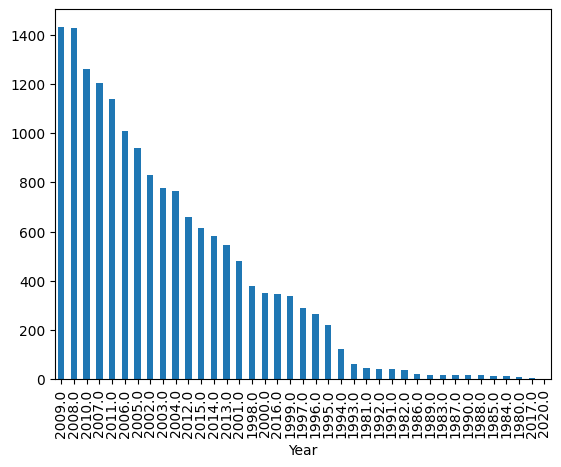

In [6]:
Games_released_Year = gamesales_df["Year"].value_counts()
Games_released_Year.plot(kind="bar")

<Axes: xlabel='Year'>

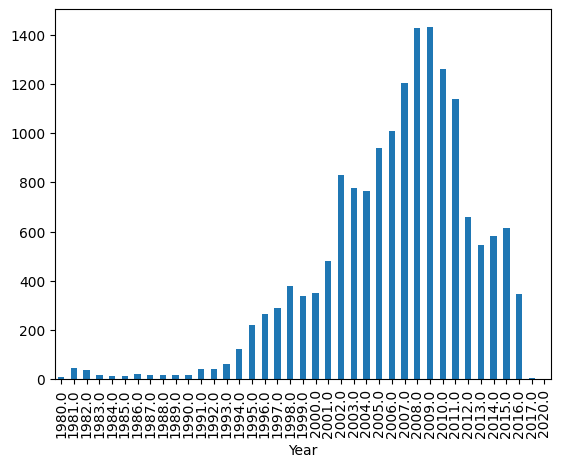

In [7]:
Games_released_timeline = Games_released_Year.sort_index()
Games_released_timeline.plot(kind="bar")

#### I wanted to see the distribution of genres in the sales per year

<Axes: xlabel='Year'>

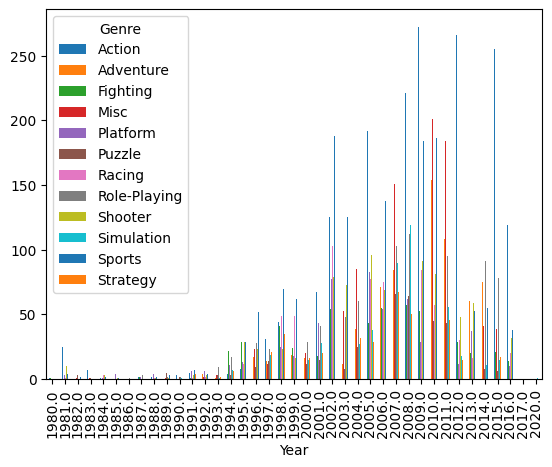

In [8]:
Genre_by_Year2 = gamesales_df.pivot_table(index="Year", columns="Genre", aggfunc='size', fill_value=0)
Genre_by_Year2.sort_index()
Genre_by_Year2.plot(kind="bar")


#### I now had a dataframe which contained a timeline of the sum of published games by genre, "Action" Can be swapped out for any of the other genres here to see their own timelines

<Axes: xlabel='Year'>

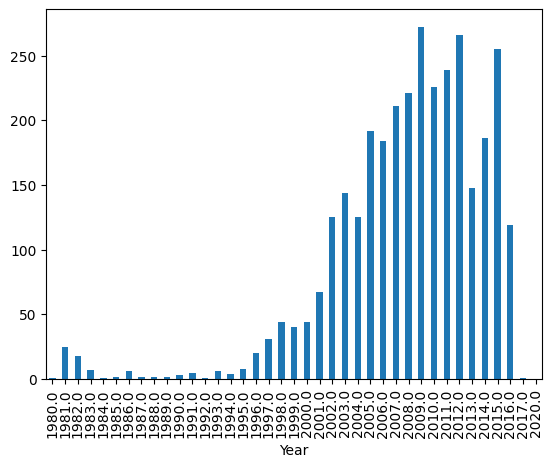

In [9]:
Genre_by_Year2["Action"].plot(kind="bar")

#### Now I wanted to do a high level comparison for the data, I decided to look at the publications of a genre in comparison to total publications in a year

In [10]:
Genre_total_comparison = Genre_by_Year2
Genre_total_comparison["Total_Games"] = Games_released_timeline
Genre_total_comparison

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total_Games
Year,,,,,,,,,,,,,
1980.0,1,0,1,4,0,0,0,0,2,0,1,0,9
1981.0,25,0,0,0,3,2,1,0,10,1,4,0,46
1982.0,18,0,0,1,5,3,2,0,5,0,2,0,36
1983.0,7,1,0,1,5,1,0,0,1,0,1,0,17
1984.0,1,0,0,1,1,3,3,0,3,0,2,0,14
1985.0,2,0,1,0,4,4,0,0,1,1,1,0,14
1986.0,6,0,0,0,6,0,1,1,4,0,3,0,21
1987.0,2,1,2,0,2,0,0,3,2,0,4,0,16
1988.0,2,0,0,0,4,1,1,3,1,1,2,0,15


In [11]:
Percentage_per_year = Genre_total_comparison.loc[:,"Action":"Strategy"].div(Genre_total_comparison["Total_Games"], axis=0)
Percentage_per_year

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,0.111111,0.000000,0.111111,0.444444,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.111111,0.000000
1981.0,0.543478,0.000000,0.000000,0.000000,0.065217,0.043478,0.021739,0.000000,0.217391,0.021739,0.086957,0.000000
1982.0,0.500000,0.000000,0.000000,0.027778,0.138889,0.083333,0.055556,0.000000,0.138889,0.000000,0.055556,0.000000
1983.0,0.411765,0.058824,0.000000,0.058824,0.294118,0.058824,0.000000,0.000000,0.058824,0.000000,0.058824,0.000000
1984.0,0.071429,0.000000,0.000000,0.071429,0.071429,0.214286,0.214286,0.000000,0.214286,0.000000,0.142857,0.000000
1985.0,0.142857,0.000000,0.071429,0.000000,0.285714,0.285714,0.000000,0.000000,0.071429,0.071429,0.071429,0.000000
1986.0,0.285714,0.000000,0.000000,0.000000,0.285714,0.000000,0.047619,0.047619,0.190476,0.000000,0.142857,0.000000
1987.0,0.125000,0.062500,0.125000,0.000000,0.125000,0.000000,0.000000,0.187500,0.125000,0.000000,0.250000,0.000000
1988.0,0.133333,0.000000,0.000000,0.000000,0.266667,0.066667,0.066667,0.200000,0.066667,0.066667,0.133333,0.000000


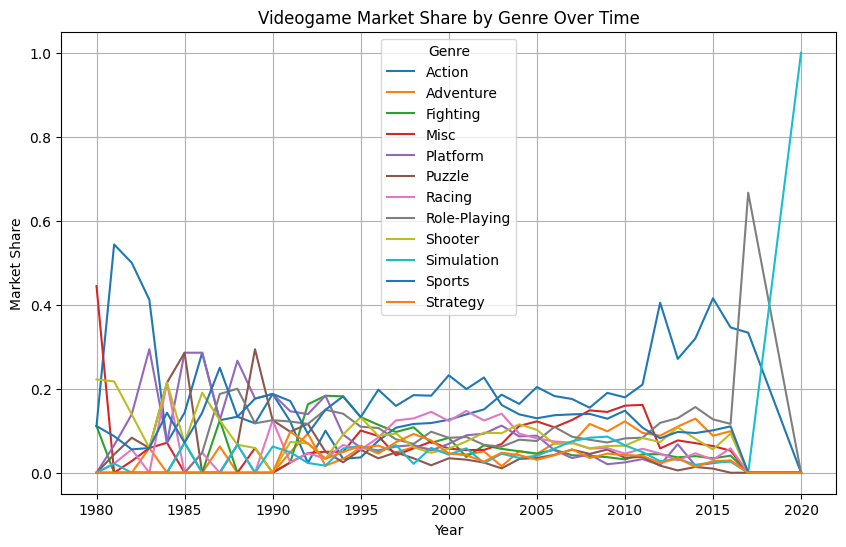

In [12]:
Percentage_per_year.plot(figsize=(10, 6))
plt.title("Videogame Market Share by Genre Over Time")
plt.xlabel("Year")
plt.ylabel("Market Share")
plt.legend(title="Genre")
plt.grid(True)
plt.show()

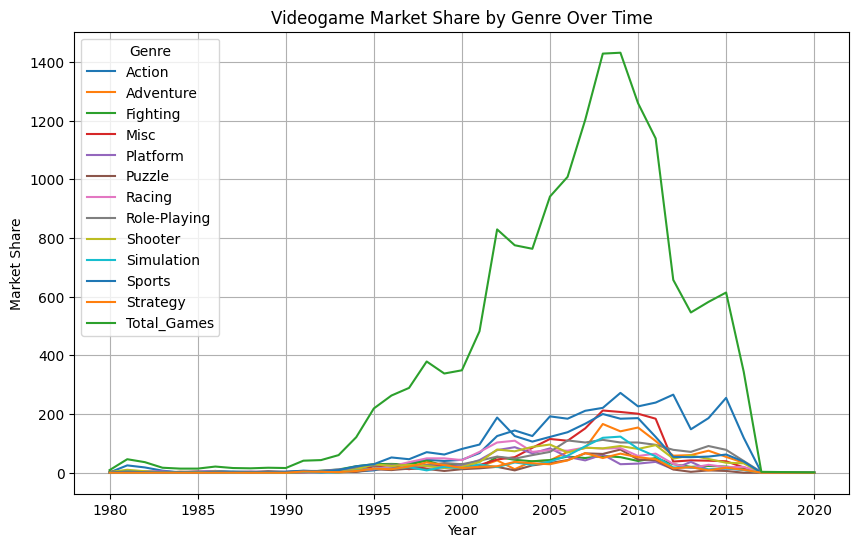

In [13]:
Genre_total_comparison.plot(figsize=(10, 6))
plt.title("Videogame Market Share by Genre Over Time")
plt.xlabel("Year")
plt.ylabel("Market Share")
plt.legend(title="Genre")
plt.grid(True)
plt.show()

In [14]:
Sales_per_year = gamesales_df.groupby("Year")

In [15]:
Sales_per_year = Sales_per_year["Global_Sales"].agg("sum")
Sales_per_year 

Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    419.31
2005.0    459.94
2006.0    521.04
2007.0    611.13
2008.0    678.90
2009.0    667.30
2010.0    600.45
2011.0    515.99
2012.0    363.54
2013.0    368.11
2014.0    337.05
2015.0    264.44
2016.0     70.93
2017.0      0.05
2020.0      0.29
Name: Global_Sales, dtype: float64

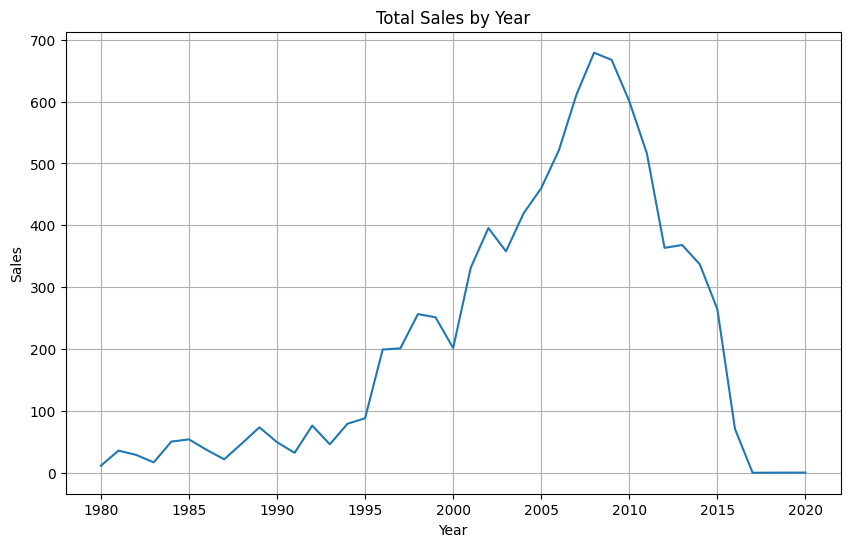

In [16]:
Sales_per_year.plot(figsize=(10,6))
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

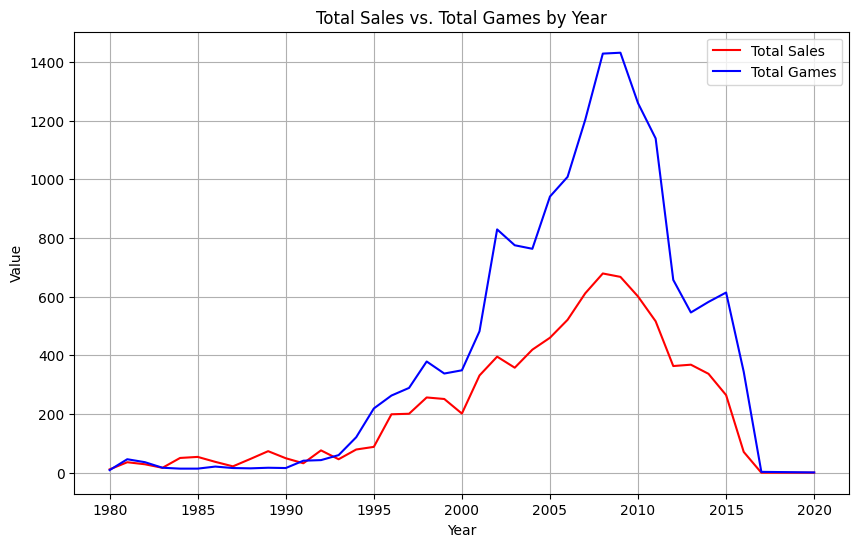

In [17]:
plt.figure(figsize=(10, 6))

plt.plot(Sales_per_year.index, Sales_per_year.values, label='Total Sales', color='red')
plt.plot(Genre_by_Year2.index, Genre_by_Year2["Total_Games"].values, label='Total Games', color='blue')

plt.title('Total Sales vs. Total Games by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
gamesales_df.dropna(subset=['Year', 'Genre', 'Global_Sales'])

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# I wanted to know the total sales of a game in a year, as well as the amount of games Published in that time.

In [19]:
df_year_sales = gamesales_df.groupby(['Year']).agg(total_sales=('Global_Sales', 'sum'),games_published=('Name', 'count')).reset_index()
df_year_sales

,Year,total_sales,games_published
0,1980.0,11.38,9
1,1981.0,35.77,46
2,1982.0,28.86,36
3,1983.0,16.79,17
4,1984.0,50.36,14
5,1985.0,53.94,14
6,1986.0,37.07,21
7,1987.0,21.74,16
8,1988.0,47.22,15
9,1989.0,73.45,17


# What about total sales in a genre?

In [20]:
df_genre_year = gamesales_df.groupby(['Year', 'Genre']).agg(genre_sales=('Global_Sales', 'sum'),genre_published=('Name', 'count')
).reset_index()

df_genre_year

,Year,Genre,genre_sales,genre_published
0,1980.0,Action,0.34,1
1,1980.0,Fighting,0.77,1
2,1980.0,Misc,2.71,4
3,1980.0,Shooter,7.07,2
4,1980.0,Sports,0.49,1
...,...,...,...,...
384,2016.0,Sports,14.60,38
385,2016.0,Strategy,0.50,10
386,2017.0,Action,0.01,1
387,2017.0,Role-Playing,0.04,2


# I Merged the two datasets together

In [21]:
df_merged = pd.merge(df_genre_year, df_year_sales, on='Year', how='left')
df_merged

,Year,Genre,genre_sales,genre_published,total_sales,games_published
0,1980.0,Action,0.34,1,11.38,9
1,1980.0,Fighting,0.77,1,11.38,9
2,1980.0,Misc,2.71,4,11.38,9
3,1980.0,Shooter,7.07,2,11.38,9
4,1980.0,Sports,0.49,1,11.38,9
...,...,...,...,...,...,...
384,2016.0,Sports,14.60,38,70.93,344
385,2016.0,Strategy,0.50,10,70.93,344
386,2017.0,Action,0.01,1,0.05,3
387,2017.0,Role-Playing,0.04,2,0.05,3


# I calculated the percentage of the years Sales per Genre then drew a graph showing their percentage sales

In [22]:
df_merged['percentage'] = (df_merged['genre_sales'] / df_merged['total_sales'])
df_merged

,Year,Genre,genre_sales,genre_published,total_sales,games_published,percentage
0,1980.0,Action,0.34,1,11.38,9,0.029877
1,1980.0,Fighting,0.77,1,11.38,9,0.067663
2,1980.0,Misc,2.71,4,11.38,9,0.238137
3,1980.0,Shooter,7.07,2,11.38,9,0.621265
4,1980.0,Sports,0.49,1,11.38,9,0.043058
...,...,...,...,...,...,...,...
384,2016.0,Sports,14.60,38,70.93,344,0.205837
385,2016.0,Strategy,0.50,10,70.93,344,0.007049
386,2017.0,Action,0.01,1,0.05,3,0.200000
387,2017.0,Role-Playing,0.04,2,0.05,3,0.800000


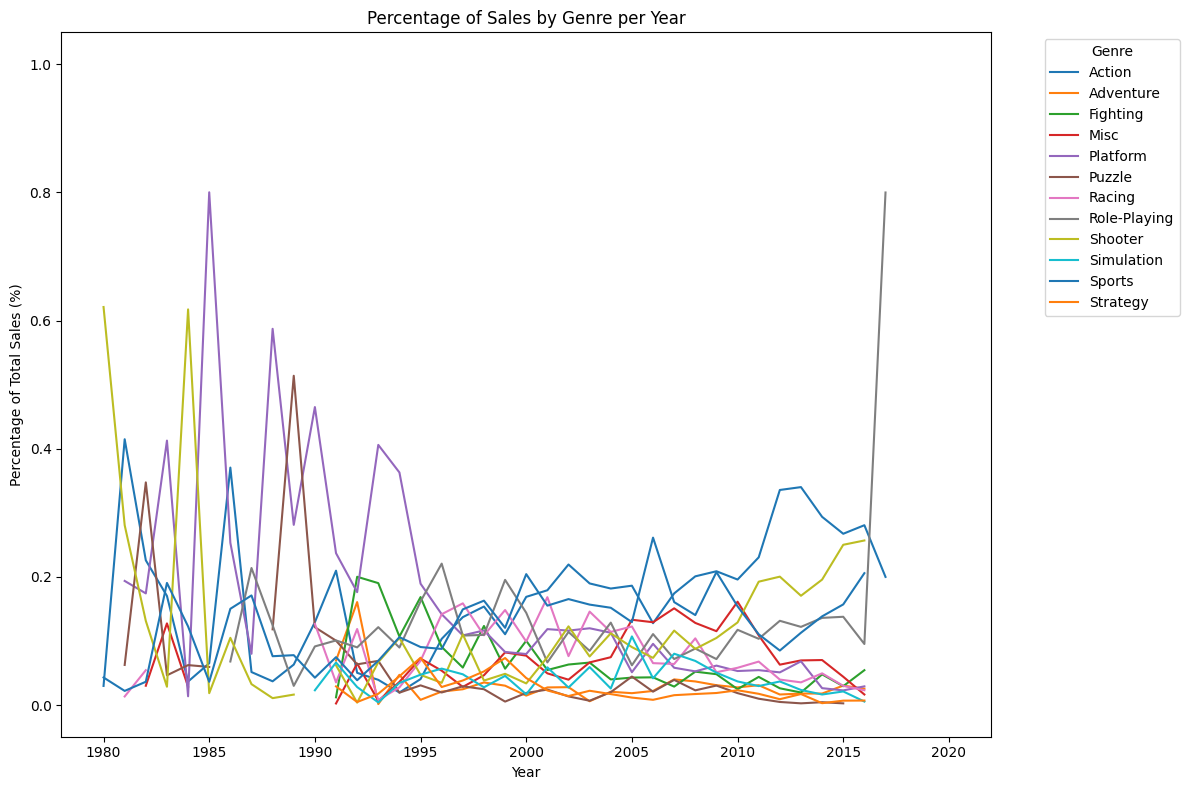

In [23]:
df_pivot = df_merged.pivot(index='Year', columns='Genre', values='percentage')

# Plot a line graph for each genre over the years
ax = df_pivot.plot(kind='line', figsize=(12, 8))

# Customize the plot
plt.title('Percentage of Sales by Genre per Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Sales (%)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
df_diff = df_pivot - Percentage_per_year
df_diff

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,-0.081234,NaN,-0.043449,-0.206307,NaN,NaN,NaN,NaN,0.399043,NaN,-0.068053,NaN
1981.0,-0.128605,NaN,NaN,NaN,0.128520,0.019144,-0.008320,NaN,0.063291,-0.009159,-0.064871,NaN
1982.0,-0.274082,NaN,NaN,0.002368,0.035401,0.264207,-0.001155,NaN,-0.007565,NaN,-0.019173,NaN
1983.0,-0.241425,-0.035000,NaN,0.068633,0.118628,-0.012367,NaN,NaN,-0.030235,NaN,0.131766,NaN
1984.0,-0.034693,NaN,NaN,-0.042636,-0.057727,-0.151935,-0.096136,NaN,0.403268,NaN,-0.020141,NaN
1985.0,-0.077599,NaN,-0.051962,NaN,0.514619,-0.226204,NaN,NaN,-0.052889,-0.070872,-0.035092,NaN
1986.0,0.084936,NaN,NaN,NaN,-0.032410,NaN,0.005254,0.020360,-0.085540,NaN,0.007399,NaN
1987.0,-0.073482,0.138972,0.124310,NaN,-0.044963,NaN,NaN,0.026391,-0.092341,NaN,-0.078887,NaN
1988.0,-0.096273,NaN,NaN,NaN,0.320584,0.051504,-0.021347,-0.075476,-0.055866,-0.066031,-0.057094,NaN


# I wanted to see if a spike in sales resulted in a spike of publications

In [25]:
df_compare = pd.merge(df_pivot, Percentage_per_year, on=['Year'], suffixes=('_salesP', '_pubP'))
df_compare

Genre,Action_salesP,Adventure_salesP,Fighting_salesP,Misc_salesP,Platform_salesP,Puzzle_salesP,Racing_salesP,Role-Playing_salesP,Shooter_salesP,Simulation_salesP,...,Fighting_pubP,Misc_pubP,Platform_pubP,Puzzle_pubP,Racing_pubP,Role-Playing_pubP,Shooter_pubP,Simulation_pubP,Sports_pubP,Strategy_pubP
Year,,,,,,,,,,,,,,,,,,,,,
1980.0,0.029877,NaN,0.067663,0.238137,NaN,NaN,NaN,NaN,0.621265,NaN,...,0.111111,0.444444,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.111111,0.000000
1981.0,0.414873,NaN,NaN,NaN,0.193738,0.062622,0.013419,NaN,0.280682,0.012580,...,0.000000,0.000000,0.065217,0.043478,0.021739,0.000000,0.217391,0.021739,0.086957,0.000000
1982.0,0.225918,NaN,NaN,0.030146,0.174290,0.347540,0.054401,NaN,0.131324,NaN,...,0.000000,0.027778,0.138889,0.083333,0.055556,0.000000,0.138889,0.000000,0.055556,0.000000
1983.0,0.170339,0.023824,NaN,0.127457,0.412746,0.046456,NaN,NaN,0.028588,NaN,...,0.000000,0.058824,0.294118,0.058824,0.000000,0.000000,0.058824,0.000000,0.058824,0.000000
1984.0,0.036736,NaN,NaN,0.028793,0.013701,0.062351,0.118149,NaN,0.617554,NaN,...,0.000000,0.071429,0.071429,0.214286,0.214286,0.000000,0.214286,0.000000,0.142857,0.000000
1985.0,0.065258,NaN,0.019466,NaN,0.800334,0.059511,NaN,NaN,0.018539,0.000556,...,0.071429,0.000000,0.285714,0.285714,0.000000,0.000000,0.071429,0.071429,0.071429,0.000000
1986.0,0.370650,NaN,NaN,NaN,0.253305,NaN,0.052873,0.067979,0.104937,NaN,...,0.000000,0.000000,0.285714,0.000000,0.047619,0.047619,0.190476,0.000000,0.142857,0.000000
1987.0,0.051518,0.201472,0.249310,NaN,0.080037,NaN,NaN,0.213891,0.032659,NaN,...,0.125000,0.000000,0.125000,0.000000,0.000000,0.187500,0.125000,0.000000,0.250000,0.000000
1988.0,0.037061,NaN,NaN,NaN,0.587251,0.118170,0.045320,0.124524,0.010801,0.000635,...,0.000000,0.000000,0.266667,0.066667,0.066667,0.200000,0.066667,0.066667,0.133333,0.000000


In [26]:
# I reset my indexes as I wanted "Year" to be the point of comparison on the two graphs.

In [27]:
df_diff_reset = df_diff.reset_index()
genre_counts_reset = Genre_by_Year2.reset_index()

In [28]:
df_diff_long = df_diff_reset.melt(
    id_vars='Year',
    var_name='Genre',
    value_name='Difference'
)

genre_counts_long = genre_counts_reset.drop(columns='Total_Games').melt(
    id_vars='Year',
    var_name='Genre',
    value_name='Game_Count'
)

In [29]:
df_combined = pd.merge(df_diff_long, genre_counts_long, on=['Year', 'Genre'], how='inner')
df_combined

,Year,Genre,Difference,Game_Count
0,1980.0,Action,-0.081234,1
1,1981.0,Action,-0.128605,25
2,1982.0,Action,-0.274082,18
3,1983.0,Action,-0.241425,7
4,1984.0,Action,-0.034693,1
...,...,...,...,...
463,2014.0,Strategy,-0.010808,8
464,2015.0,Strategy,-0.020805,17
465,2016.0,Strategy,-0.022021,10
466,2017.0,Strategy,NaN,0


In [30]:
df_combined = df_combined[df_combined['Game_Count'] > 0]

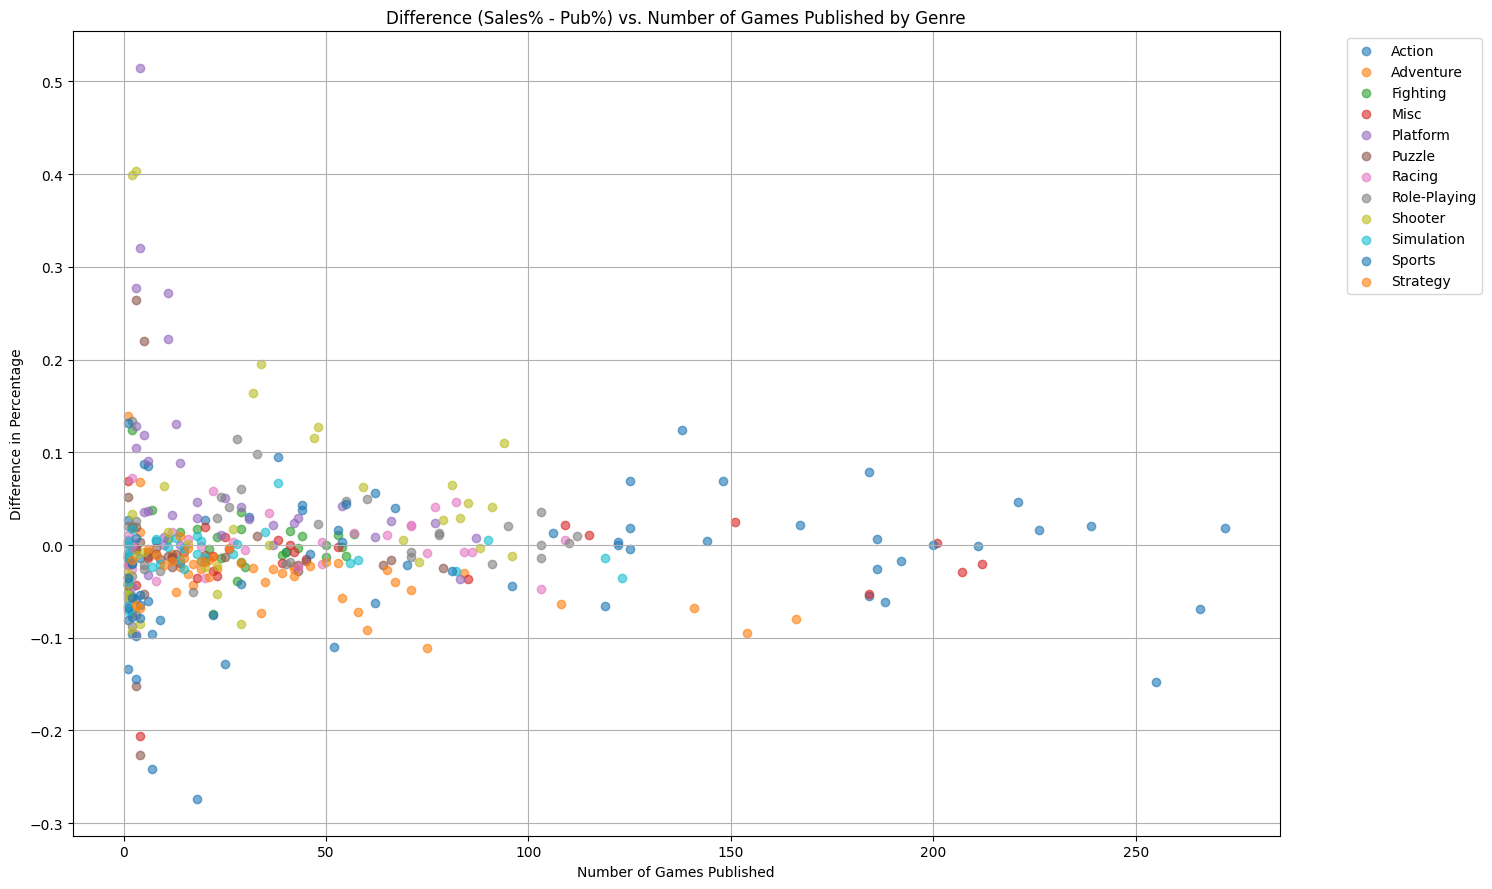

In [31]:
plt.figure(figsize=(15, 9))
genres = df_combined['Genre'].unique()

for genre in genres:
    data = df_combined[df_combined['Genre'] == genre]
    plt.scatter(data['Game_Count'], data['Difference'], alpha=0.6, label=genre)

plt.title('Difference (Sales% - Pub%) vs. Number of Games Published by Genre')
plt.xlabel('Number of Games Published')
plt.ylabel('Difference in Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

In [32]:
df_compare.reset_index(inplace=True)

In [33]:
df_compare

Genre,Year,Action_salesP,Adventure_salesP,Fighting_salesP,Misc_salesP,Platform_salesP,Puzzle_salesP,Racing_salesP,Role-Playing_salesP,Shooter_salesP,...,Fighting_pubP,Misc_pubP,Platform_pubP,Puzzle_pubP,Racing_pubP,Role-Playing_pubP,Shooter_pubP,Simulation_pubP,Sports_pubP,Strategy_pubP
0,1980.0,0.029877,NaN,0.067663,0.238137,NaN,NaN,NaN,NaN,0.621265,...,0.111111,0.444444,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.111111,0.000000
1,1981.0,0.414873,NaN,NaN,NaN,0.193738,0.062622,0.013419,NaN,0.280682,...,0.000000,0.000000,0.065217,0.043478,0.021739,0.000000,0.217391,0.021739,0.086957,0.000000
2,1982.0,0.225918,NaN,NaN,0.030146,0.174290,0.347540,0.054401,NaN,0.131324,...,0.000000,0.027778,0.138889,0.083333,0.055556,0.000000,0.138889,0.000000,0.055556,0.000000
3,1983.0,0.170339,0.023824,NaN,0.127457,0.412746,0.046456,NaN,NaN,0.028588,...,0.000000,0.058824,0.294118,0.058824,0.000000,0.000000,0.058824,0.000000,0.058824,0.000000
4,1984.0,0.036736,NaN,NaN,0.028793,0.013701,0.062351,0.118149,NaN,0.617554,...,0.000000,0.071429,0.071429,0.214286,0.214286,0.000000,0.214286,0.000000,0.142857,0.000000
5,1985.0,0.065258,NaN,0.019466,NaN,0.800334,0.059511,NaN,NaN,0.018539,...,0.071429,0.000000,0.285714,0.285714,0.000000,0.000000,0.071429,0.071429,0.071429,0.000000
6,1986.0,0.370650,NaN,NaN,NaN,0.253305,NaN,0.052873,0.067979,0.104937,...,0.000000,0.000000,0.285714,0.000000,0.047619,0.047619,0.190476,0.000000,0.142857,0.000000
7,1987.0,0.051518,0.201472,0.249310,NaN,0.080037,NaN,NaN,0.213891,0.032659,...,0.125000,0.000000,0.125000,0.000000,0.000000,0.187500,0.125000,0.000000,0.250000,0.000000
8,1988.0,0.037061,NaN,NaN,NaN,0.587251,0.118170,0.045320,0.124524,0.010801,...,0.000000,0.000000,0.266667,0.066667,0.066667,0.200000,0.066667,0.066667,0.133333,0.000000
9,1989.0,0.063172,NaN,NaN,0.017427,0.281280,0.513955,NaN,0.029952,0.016338,...,0.000000,0.058824,0.176471,0.294118,0.000000,0.117647,0.058824,0.000000,0.176471,0.000000


In [34]:
#This Graph can have its genre name changed and will have its values change to show EACH genres distribution

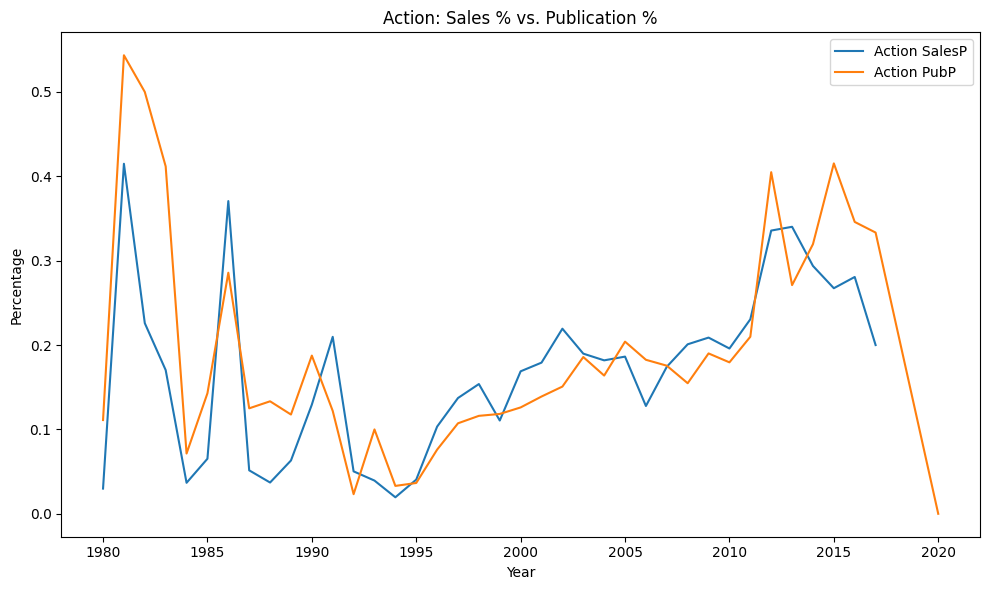

In [35]:
genre = 'Action' 
plt.figure(figsize=(10, 6))
plt.plot(df_compare['Year'], df_compare[f'{genre}_salesP'],label=f'{genre} SalesP')
plt.plot(df_compare['Year'], df_compare[f'{genre}_pubP'], label=f'{genre} PubP')
plt.title(f'{genre}: Sales % vs. Publication %')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.tight_layout()
plt.show()

# Now I moved on to cleaning up my second dataset to prepare for a merge

In [36]:
metacritic_df.drop(columns=["Unnamed: 0"], inplace=True)
metacritic_df

,Title,Release Date,Score
0,1. Baldur's Gate 3,"DEC 8, 2023 • Rated M",99
1,2. The Legend of Zelda: Ocarina of Time,"NOV 23, 1998 • Rated E",99
2,3. Tony Hawk's Pro Skater 2,"SEP 20, 2000 • Rated T",98
3,4. Grand Theft Auto IV,"APR 29, 2008 • Rated M",98
4,5. SoulCalibur,"SEP 8, 1999 • Rated T",98
...,...,...,...
14821,"14,777. Double Dragon II: Wander of the Dragons","APR 5, 2013 • Rated T",17
14822,"14,778. Vroom in the Night Sky","APR 5, 2017 • Rated E",17
14823,"14,779. Yaris","OCT 10, 2007 • Rated E10+",11
14824,"14,780. Family Party: 30 Great Games Obstacle ...","DEC 4, 2012",66


# After copious googling, I discovered the N=1 function, this allowed me to split only the first fullstop and get access to the titles of each game.

In [37]:
metacritic_df["Release Date"] = metacritic_df["Release Date"].str.split("•",expand=True)[0].str.strip()
metacritic_df["Release Date"]

0         DEC 8, 2023
1        NOV 23, 1998
2        SEP 20, 2000
3        APR 29, 2008
4         SEP 8, 1999
             ...     
14821     APR 5, 2013
14822     APR 5, 2017
14823    OCT 10, 2007
14824     DEC 4, 2012
14825    OCT 28, 2010
Name: Release Date, Length: 14826, dtype: object

In [38]:
metacritic_df[['Rank', 'Game']] = metacritic_df["Title"].str.split(".",n=1,expand=True)
metacritic_df

,Title,Release Date,Score,Rank,Game
0,1. Baldur's Gate 3,"DEC 8, 2023",99,1,Baldur's Gate 3
1,2. The Legend of Zelda: Ocarina of Time,"NOV 23, 1998",99,2,The Legend of Zelda: Ocarina of Time
2,3. Tony Hawk's Pro Skater 2,"SEP 20, 2000",98,3,Tony Hawk's Pro Skater 2
3,4. Grand Theft Auto IV,"APR 29, 2008",98,4,Grand Theft Auto IV
4,5. SoulCalibur,"SEP 8, 1999",98,5,SoulCalibur
...,...,...,...,...,...
14821,"14,777. Double Dragon II: Wander of the Dragons","APR 5, 2013",17,"14,777",Double Dragon II: Wander of the Dragons
14822,"14,778. Vroom in the Night Sky","APR 5, 2017",17,"14,778",Vroom in the Night Sky
14823,"14,779. Yaris","OCT 10, 2007",11,"14,779",Yaris
14824,"14,780. Family Party: 30 Great Games Obstacle ...","DEC 4, 2012",66,"14,780",Family Party: 30 Great Games Obstacle Arcade


In [39]:
metacritic_df[['Month_Day', 'Year']] = metacritic_df["Release Date"].str.split(",", expand=True)
metacritic_df

,Title,Release Date,Score,Rank,Game,Month_Day,Year
0,1. Baldur's Gate 3,"DEC 8, 2023",99,1,Baldur's Gate 3,DEC 8,2023
1,2. The Legend of Zelda: Ocarina of Time,"NOV 23, 1998",99,2,The Legend of Zelda: Ocarina of Time,NOV 23,1998
2,3. Tony Hawk's Pro Skater 2,"SEP 20, 2000",98,3,Tony Hawk's Pro Skater 2,SEP 20,2000
3,4. Grand Theft Auto IV,"APR 29, 2008",98,4,Grand Theft Auto IV,APR 29,2008
4,5. SoulCalibur,"SEP 8, 1999",98,5,SoulCalibur,SEP 8,1999
...,...,...,...,...,...,...,...
14821,"14,777. Double Dragon II: Wander of the Dragons","APR 5, 2013",17,"14,777",Double Dragon II: Wander of the Dragons,APR 5,2013
14822,"14,778. Vroom in the Night Sky","APR 5, 2017",17,"14,778",Vroom in the Night Sky,APR 5,2017
14823,"14,779. Yaris","OCT 10, 2007",11,"14,779",Yaris,OCT 10,2007
14824,"14,780. Family Party: 30 Great Games Obstacle ...","DEC 4, 2012",66,"14,780",Family Party: 30 Great Games Obstacle Arcade,DEC 4,2012


In [40]:
metacritic_df_fusion = metacritic_df[["Score", "Month_Day","Year","Rank", "Game" ]]
metacritic_df_fusion

,Score,Month_Day,Year,Rank,Game
0,99,DEC 8,2023,1,Baldur's Gate 3
1,99,NOV 23,1998,2,The Legend of Zelda: Ocarina of Time
2,98,SEP 20,2000,3,Tony Hawk's Pro Skater 2
3,98,APR 29,2008,4,Grand Theft Auto IV
4,98,SEP 8,1999,5,SoulCalibur
...,...,...,...,...,...
14821,17,APR 5,2013,"14,777",Double Dragon II: Wander of the Dragons
14822,17,APR 5,2017,"14,778",Vroom in the Night Sky
14823,11,OCT 10,2007,"14,779",Yaris
14824,66,DEC 4,2012,"14,780",Family Party: 30 Great Games Obstacle Arcade


# Although it complained, it does work!

In [41]:
metacritic_df_fusion["Game"] = metacritic_df_fusion["Game"].str.strip()
metacritic_df_fusion['Score'] = pd.to_numeric(metacritic_df_fusion.loc[:,'Score'], errors='coerce')
metacritic_df_fusion['Rank'] = pd.to_numeric(metacritic_df_fusion.loc[:,'Rank'], errors='coerce')
metacritic_df_fusion['Year'] = pd.to_numeric(metacritic_df_fusion.loc[:,'Year'], errors='coerce')

C:\Users\artur\AppData\Local\Temp\ipykernel_15736\1028132208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metacritic_df_fusion["Game"] = metacritic_df_fusion["Game"].str.strip()
C:\Users\artur\AppData\Local\Temp\ipykernel_15736\1028132208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metacritic_df_fusion['Score'] = pd.to_numeric(metacritic_df_fusion.loc[:,'Score'], errors='coerce')
C:\Users\artur\AppData\Local\Temp\ipykernel_15736\1028132208.py:3: SettingWithCopyWarning: 
A value is trying to b

In [42]:
metacritic_df_fusion.dtypes

Score        float64
Month_Day     object
Year           int64
Rank         float64
Game          object
dtype: object

In [43]:
metacritic_df_fusion

,Score,Month_Day,Year,Rank,Game
0,99.0,DEC 8,2023,1.0,Baldur's Gate 3
1,99.0,NOV 23,1998,2.0,The Legend of Zelda: Ocarina of Time
2,98.0,SEP 20,2000,3.0,Tony Hawk's Pro Skater 2
3,98.0,APR 29,2008,4.0,Grand Theft Auto IV
4,98.0,SEP 8,1999,5.0,SoulCalibur
...,...,...,...,...,...
14821,17.0,APR 5,2013,NaN,Double Dragon II: Wander of the Dragons
14822,17.0,APR 5,2017,NaN,Vroom in the Night Sky
14823,11.0,OCT 10,2007,NaN,Yaris
14824,66.0,DEC 4,2012,NaN,Family Party: 30 Great Games Obstacle Arcade


In [44]:
df_joined = pd.merge(gamesales_df, metacritic_df_fusion, how='left',left_on='Name', right_on='Game')
df_joined

,Rank_x,Name,Platform,Year_x,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Score,Month_Day,Year_y,Rank_y,Game
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,NOV 19,2006.0,NaN,Wii Sports
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,84.0,JUN 2,2004.0,NaN,Super Mario Bros.
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,APR 27,2008.0,NaN,Mario Kart Wii
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,JUL 26,2009.0,NaN,Wii Sports Resort
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16737,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16738,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,50.0,JUN 28,2002.0,NaN,Men in Black II: Alien Escape
16739,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16740,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN


# Although I had gotten the merge, many of my columns had been left empty.

In [45]:
df_joined["Score"].isna().sum()

np.int64(9284)

In [46]:
df_joined["Year_x"] = df_joined["Year_x"].astype("Int64") 

In [47]:
df_joined_datetest = df_joined['date'] = pd.to_datetime(df_joined['Month_Day'] + ' ' + df_joined['Year_x'].astype(str), format='%b %d %Y',errors="coerce")

df_joined_datetest.isnull().sum()

np.int64(9415)

In [48]:
df_joined

,Rank_x,Name,Platform,Year_x,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Score,Month_Day,Year_y,Rank_y,Game,date
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,NOV 19,2006.0,NaN,Wii Sports,2006-11-19
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,84.0,JUN 2,2004.0,NaN,Super Mario Bros.,1985-06-02
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,APR 27,2008.0,NaN,Mario Kart Wii,2008-04-27
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,JUL 26,2009.0,NaN,Wii Sports Resort,2009-07-26
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16737,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaT
16738,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,50.0,JUN 28,2002.0,NaN,Men in Black II: Alien Escape,2003-06-28
16739,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaT
16740,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaT


# I wanted the average total sales for each genre per year

In [49]:
avg_sales = df_joined.groupby(['Genre', 'Year_x'])['Global_Sales'].mean().reset_index()
avg_sales.rename(columns={'Global_Sales': 'Avg_Sales'}, inplace=True)

# I wanted to merge the average sales back onto the individual games dataset
# This way, each game row gets the average for its Genre & Year.

In [50]:
df_games = pd.merge(df_joined, avg_sales, on=['Genre', 'Year_x'], how='left')

# Calculated the difference between each game's sales and the average for that year/genre

In [51]:
df_games['Sales_Diff'] = df_games['Global_Sales'] - df_games['Avg_Sales']

# I then did the exact same steps, but for the median

In [52]:
median_sales = df_joined.groupby(["Genre","Year_x"])["Global_Sales"].median().reset_index()
median_sales.rename(columns={"Global_Sales":"Median_Sales"}, inplace = True)
df_games = pd.merge(df_games, median_sales, on=['Genre', 'Year_x'], how='left')

(0.0, 2.0)

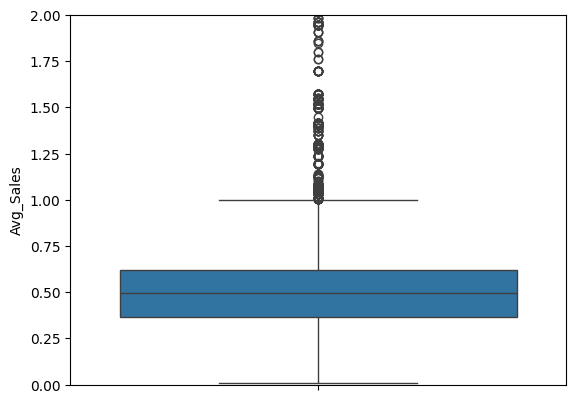

In [53]:
sns.boxplot(df_games["Avg_Sales"])
plt.ylim(0,2)

(0.0, 2.0)

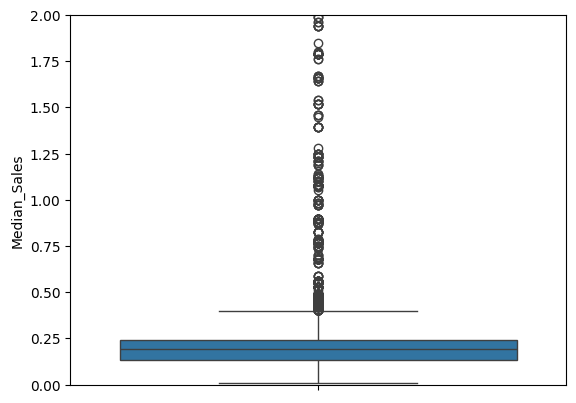

In [54]:
sns.boxplot(df_games["Median_Sales"])
plt.ylim(0,2)

# I decided to add another dataframe to see If I could improve the "None" Values in my Score and Date columns

In [55]:
df_3 = pd.DataFrame()
fuente_3 = "jvc.csv"

In [56]:
df_3 = pd.read_csv(fuente_3)
df_3

,Unnamed: 0,game_fr,game_en,platform,website_rating,public_rating,publishor/developer,release,type,classification,url,description
0,1,.hack//G.U. Last Recode,.hack//G.U. Last Recode,PS4,14/20,--/20,Bandai Namco Entertainment,03 Novembre 2017,RPG,+12 ans,http://www.jeuxvideo.com/jeux/ps4/jeu-674262/,"Au contraire d’autres titres, None ,''.hack'' ..."
1,2,.hack//G.U. Vol.1//Rebirth,.hack//G.U. Vol. 1//Rebirth,PS2,15/20,18.2/20,Bandai Namco CyberConnect2,Date de sortie inconnue,RPG,+7 ans,http://www.jeuxvideo.com/jeux/playstation-2-ps...,Avec plus de 20 œuvres de fiction sur de mult...
2,3,.hack//Infection Part 1,.hack//Infection: Part 1,PS2,15/20,15.1/20,CyberConnect2 Bandai,26 Mars 2004,RPG,+12 ans,http://www.jeuxvideo.com/jeux/playstation-2-ps...,S'appuyant sur la maxime « Mieux vaut tard qu...
3,4,.hack//Mutation Part 2,.hack//Mutation: Part 2,PS2,14/20,16.4/20,Bandai CyberConnect2,18 Juin 2004,RPG,+12 ans,http://www.jeuxvideo.com/jeux/playstation-2-ps...,Voici enfin le second volet de la quadrilogie...
4,5,.hack//Outbreak Part 3,.hack//Outbreak: Part 3,PS2,13/20,15.3/20,CyberConnect2 Atari,17 Septembre 2004,RPG,+12 ans,http://www.jeuxvideo.com/jeux/playstation-2-ps...,Comme la maxime «Jamais deux sans trois» ne c...
...,...,...,...,...,...,...,...,...,...,...,...,...
17836,17837,Zumba Fitness,Zumba Fitness,360,9/20,11.7/20,Digital Bros Pipeworks Software,12 Novembre 2010,Rythme Coaching Sport,+3 ans,http://www.jeuxvideo.com/jeux/jeu-75111/,Il n'a jamais été autant question d'entreteni...
17837,17838,Zumba Fitness 2,Zumba Fitness 2,Wii,11/20,16/20,Zoë Mode Majesco,24 Février 2012,Rythme Coaching,+3 ans,http://www.jeuxvideo.com/jeux/jeu-77041/,Malgré une première tentative décevante et lo...
17838,17839,Zumba Fitness Core,Zumba Fitness Core,360,14/20,16/20,505 Games Zoetrope Interactive,09 Novembre 2012,Rythme Coaching,+12 ans,http://www.jeuxvideo.com/jeux/jeu-79073/,Tentant une fois de plus de surfer sur le suc...
17839,17840,Zumba Fitness Rush,Zumba Fitness,360,11/20,17.3/20,505 Games Zoë Mode,28 Février 2012,Rythme,+3 ans,http://www.jeuxvideo.com/jeux/xbox-360/0004269...,"Malgré des critiques peu élogieuses, Zumba Fi..."


# Although the Dates were in french, I saw that I could use these release dates to improve my current dataframe (I did this on Tuesday so I may have consulted Mr GPT to get these results....)

In [58]:
month_map_full = {
    "janvier": "January",
    "février": "February",
    "mars": "March",
    "avril": "April",
    "mai": "May",
    "juin": "June",
    "juillet": "July",
    "août": "August",
    "septembre": "September",
    "octobre": "October",
    "novembre": "November",
    "décembre": "December"
}

def fix_french_date(date_str):
    if not isinstance(date_str, str):
        return date_str
    date_str = date_str.lower().strip()
    for fr, en in month_map_full.items():
        date_str = date_str.replace(fr, en)
    # If the day is missing (e.g., "january 2017"), prepend a default day
    if not date_str[0].isdigit():
        date_str = "1 " + date_str
    return date_str

df_3["Année_fixed"] = df_3["release"].apply(fix_french_date)
df_3["date_French"] = pd.to_datetime(df_3["Année_fixed"], errors='coerce', format="%d %B %Y")
df_3

,Unnamed: 0,game_fr,game_en,platform,website_rating,public_rating,publishor/developer,release,type,classification,url,description,Année_fixed,date_French
0,1,.hack//G.U. Last Recode,.hack//G.U. Last Recode,PS4,14/20,--/20,Bandai Namco Entertainment,03 Novembre 2017,RPG,+12 ans,http://www.jeuxvideo.com/jeux/ps4/jeu-674262/,"Au contraire d’autres titres, None ,''.hack'' ...",03 November 2017,2017-11-03
1,2,.hack//G.U. Vol.1//Rebirth,.hack//G.U. Vol. 1//Rebirth,PS2,15/20,18.2/20,Bandai Namco CyberConnect2,Date de sortie inconnue,RPG,+7 ans,http://www.jeuxvideo.com/jeux/playstation-2-ps...,Avec plus de 20 œuvres de fiction sur de mult...,1 date de sortie inconnue,NaT
2,3,.hack//Infection Part 1,.hack//Infection: Part 1,PS2,15/20,15.1/20,CyberConnect2 Bandai,26 Mars 2004,RPG,+12 ans,http://www.jeuxvideo.com/jeux/playstation-2-ps...,S'appuyant sur la maxime « Mieux vaut tard qu...,26 March 2004,2004-03-26
3,4,.hack//Mutation Part 2,.hack//Mutation: Part 2,PS2,14/20,16.4/20,Bandai CyberConnect2,18 Juin 2004,RPG,+12 ans,http://www.jeuxvideo.com/jeux/playstation-2-ps...,Voici enfin le second volet de la quadrilogie...,18 June 2004,2004-06-18
4,5,.hack//Outbreak Part 3,.hack//Outbreak: Part 3,PS2,13/20,15.3/20,CyberConnect2 Atari,17 Septembre 2004,RPG,+12 ans,http://www.jeuxvideo.com/jeux/playstation-2-ps...,Comme la maxime «Jamais deux sans trois» ne c...,17 September 2004,2004-09-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17836,17837,Zumba Fitness,Zumba Fitness,360,9/20,11.7/20,Digital Bros Pipeworks Software,12 Novembre 2010,Rythme Coaching Sport,+3 ans,http://www.jeuxvideo.com/jeux/jeu-75111/,Il n'a jamais été autant question d'entreteni...,12 November 2010,2010-11-12
17837,17838,Zumba Fitness 2,Zumba Fitness 2,Wii,11/20,16/20,Zoë Mode Majesco,24 Février 2012,Rythme Coaching,+3 ans,http://www.jeuxvideo.com/jeux/jeu-77041/,Malgré une première tentative décevante et lo...,24 February 2012,2012-02-24
17838,17839,Zumba Fitness Core,Zumba Fitness Core,360,14/20,16/20,505 Games Zoetrope Interactive,09 Novembre 2012,Rythme Coaching,+12 ans,http://www.jeuxvideo.com/jeux/jeu-79073/,Tentant une fois de plus de surfer sur le suc...,09 November 2012,2012-11-09
17839,17840,Zumba Fitness Rush,Zumba Fitness,360,11/20,17.3/20,505 Games Zoë Mode,28 Février 2012,Rythme,+3 ans,http://www.jeuxvideo.com/jeux/xbox-360/0004269...,"Malgré des critiques peu élogieuses, Zumba Fi...",28 February 2012,2012-02-28


# I managed to get another ~1400 dates into my dataframe

In [59]:
french_date_mapping = dict(zip(df_3["game_en"], df_3["date_French"]))

In [60]:
df_games["date"] = df_games["date"].fillna(df_games["Name"].map(french_date_mapping))

In [61]:
df_games["date"].isna().sum()

np.int64(7876)

In [62]:
df_games["Score"].isna().sum()

np.int64(9284)

# I set about cleaning my dataset further.

In [63]:
df_games_cleaned = df_games.drop(columns=["Month_Day", "Year_y", "Rank_y"])
df_games_gigcleaned = df_games_cleaned.dropna()

# I should have done this step much sooner! For the presentation consider using these two lines of code for your main dataset to show trends without your more unreliable low sample size years.

In [64]:
df_games_gigcleaned2 = df_games_gigcleaned[df_games_gigcleaned["Year_x"] >= 1995]


In [65]:
df_games_gigcleaned2 = df_games_gigcleaned2[df_games_gigcleaned2["Year_x"] <= 2015]

<Axes: ylabel='Avg_Sales'>

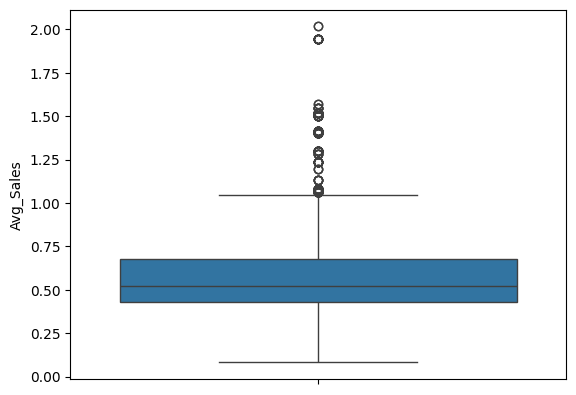

In [66]:
sns.boxplot(df_games_gigcleaned2["Avg_Sales"])

<Axes: ylabel='Median_Sales'>

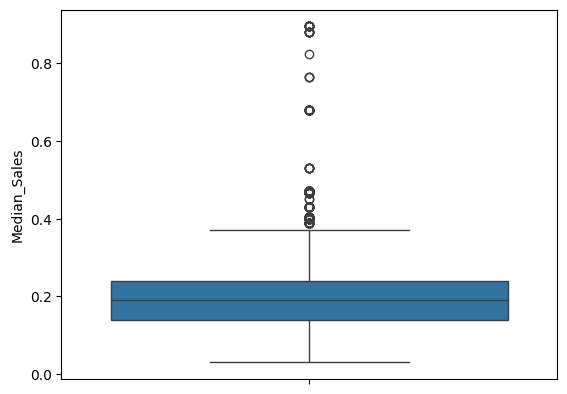

In [67]:
sns.boxplot(df_games_gigcleaned2["Median_Sales"])

<Axes: ylabel='Sales_Diff'>

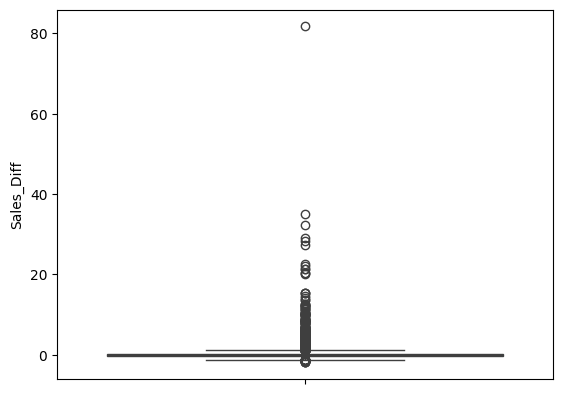

In [68]:
sns.boxplot(df_games_gigcleaned2["Sales_Diff"])

# Now I set about getting my datetimes ready to be used for checking frequencies.

In [69]:
df_games_gigcleaned2['Year_Exact'] = df_games_gigcleaned2['date'].dt.year
df_games_gigcleaned2['Month_Exact'] = df_games_gigcleaned2['date'].dt.month

# This code allowed me to have each row in my dataset look for other games rows with the same genre within the timeframe of 2 months, It is not perfectly precise as it does not use days, however trying to do it with days made the operation run really slowly so I settled for using months


In [70]:
df_games_gigcleaned2['start'] = df_games_gigcleaned2['date'] - pd.DateOffset(months=1)
df_games_gigcleaned2['end']   = df_games_gigcleaned2['date'] + pd.DateOffset(months=1)

def freq_count(row):
    mask = (
        (df_games_gigcleaned2['Genre'] == row['Genre']) &
        (df_games_gigcleaned2['date'] >= row['start'])   &
        (df_games_gigcleaned2['date'] <= row['end'])
    )
    return df_games_gigcleaned2.loc[mask].shape[0] - 1


In [71]:
df_games_gigcleaned2['Game Frequency'] = df_games_gigcleaned2.apply(freq_count, axis=1)

# I thought this showed a negative correlation!, however I was aware that many values were below zero. So I decided to use a logarithmic scale to check if there was a correlation

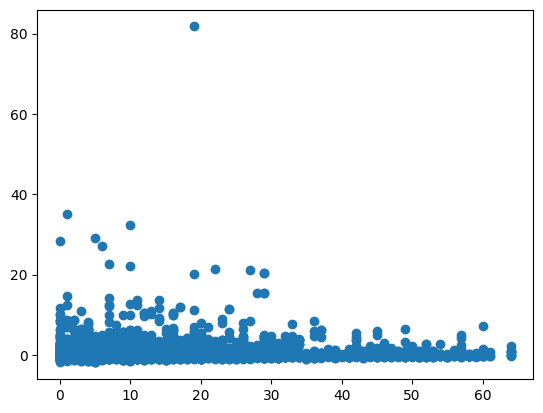

In [72]:
plt.scatter(df_games_gigcleaned2['Game Frequency'], df_games_gigcleaned2['Sales_Diff'])

In [85]:
df_games_gigcleaned2['Percentage_Sales'] = (df_games_gigcleaned2['Global_Sales'] / df_games_gigcleaned2['Avg_Sales'])*100
df_games_gigcleaned2

,Rank_x,Name,Platform,Year_x,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,Avg_Sales,Sales_Diff,Median_Sales,Year_Exact,Month_Exact,start,end,Game Frequency,Percentage_Sales,Score_Bin
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,...,0.986667,81.753333,0.170,2006,11,2006-10-19,2006-12-19,19,8385.810811,80
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,...,0.852169,34.967831,0.200,2008,4,2008-03-27,2008-05-27,1,4203.393185,90
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,...,0.748973,32.251027,0.200,2009,7,2009-06-26,2009-08-26,10,4406.033487,80
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,...,0.922222,29.087778,0.145,2006,5,2006-04-15,2006-06-15,5,3254.096386,90
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,...,0.612364,28.407636,0.070,2006,2,2006-01-12,2006-03-12,0,4739.014252,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16730,16589,Secret Files 2: Puritas Cordis,DS,2009,Adventure,Deep Silver,0.00,0.01,0.00,0.00,...,0.152727,-0.142727,0.060,2009,10,2009-09-29,2009-11-29,9,6.547619,70
16732,16591,Mega Brain Boost,DS,2008,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,...,0.243594,-0.233594,0.095,2008,1,2007-12-22,2008-02-22,0,4.105196,50
16735,16594,Myst IV: Revelation,PC,2004,Adventure,Ubisoft,0.01,0.00,0.00,0.00,...,0.223077,-0.213077,0.120,2004,9,2004-08-30,2004-10-30,6,4.482759,90
16738,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,...,0.362933,-0.352933,0.130,2003,6,2003-05-28,2003-07-28,6,2.755327,50


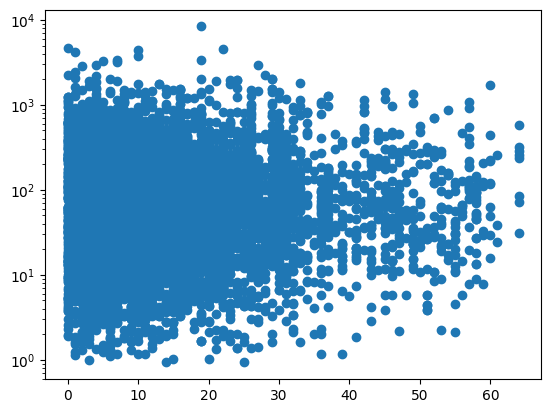

In [86]:
plt.scatter(df_games_gigcleaned2['Game Frequency'], df_games_gigcleaned2['Percentage_Sales'])
plt.yscale("log", base=10)
plt.show()

# I decided to make a heatmap as I had many columns that I was no longer using

In [76]:
df_heatmap = df_games_gigcleaned2.drop(columns=["Rank_x",	"Game",	"Platform",	"Year_x","Publisher"	,"NA_Sales"	,"EU_Sales",	"JP_Sales"	,"Other_Sales"])

# Found a clear trend that games release in higher frequencies during christmas!

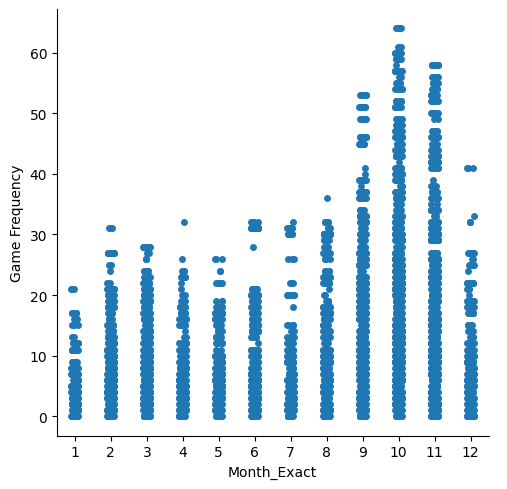

In [77]:
chart = sns.catplot(x = "Month_Exact", y="Game Frequency", data=df_heatmap)

# Although frequencies do not have a large impact on sales, scores seem to matter!

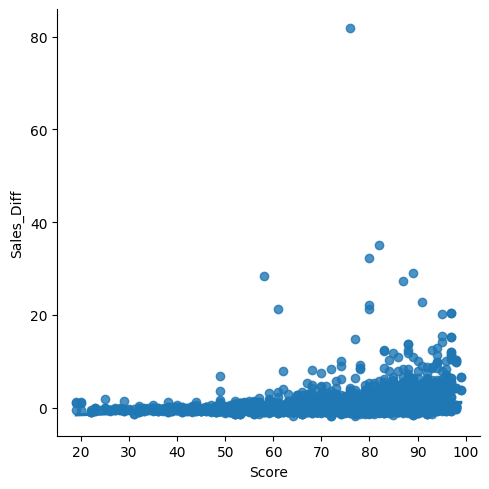

In [78]:
sns.lmplot(x ='Score', y= 'Sales_Diff',data= df_games_gigcleaned2)

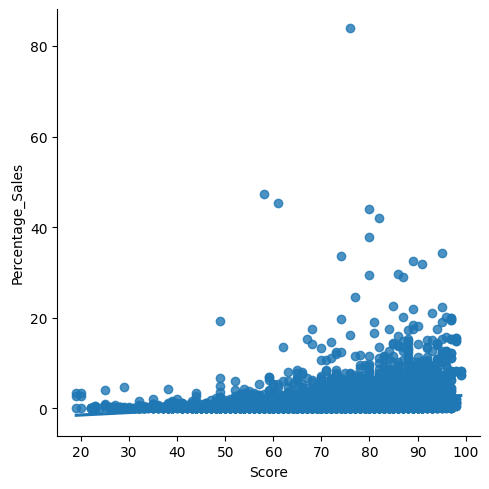

In [79]:
sns.lmplot(x ='Score', y= 'Percentage_Sales',data= df_games_gigcleaned2)

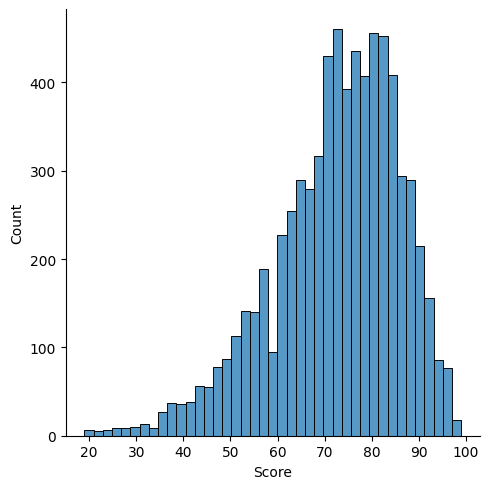

In [81]:
sns.displot(x ='Score',data= df_games_gigcleaned2)

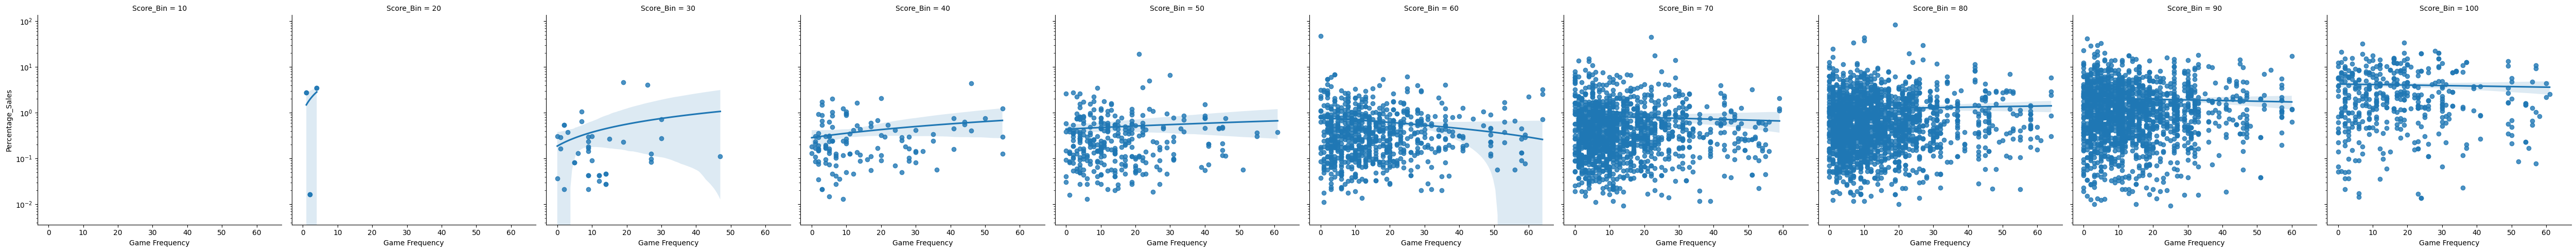

In [82]:
bins = [0,10,20,30,40, 50, 60, 70,80,90, 100] 
labels = ["10","20","30","40", "50", "60", "70","80","90", "100"]

df_games_gigcleaned2['Score_Bin'] = pd.cut(
    df_games_gigcleaned2['Score'],
    bins=bins,
    labels=labels,
    include_lowest=True 
)

sns.lmplot(
    x='Game Frequency',
    y='Percentage_Sales',
    data=df_games_gigcleaned2,
    col='Score_Bin'
)
plt.yscale("log", base=10)
plt.show()

# There was an uneven distribution of Scores! 

In [84]:
df_games_gigcleaned2['Score_Bin'].value_counts()

Score_Bin
80     2151
90     1772
70     1478
60      785
100     436
50      314
40      122
30       40
20        6
10        0
Name: count, dtype: int64

In [ ]:
sns.lmplot(x ='Game Frequency', y= 'Median_Sales',data= df_games_gigcleaned2)